In [27]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

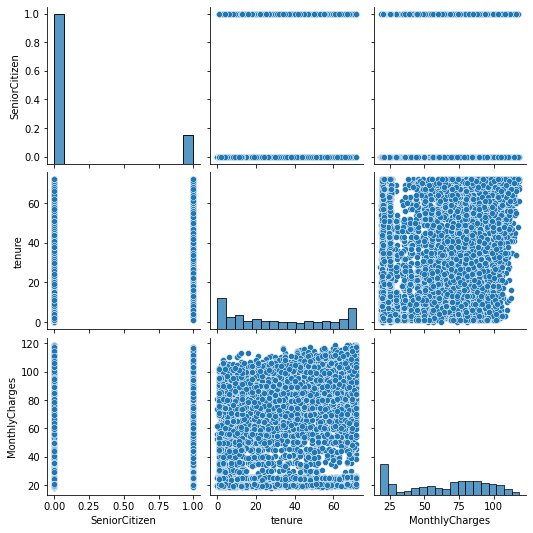

In [26]:
df = pd.read_csv("kaggle_telco.csv")
y = df.pop('Churn')
xvars = ["SeniorCitizen","tenure","MonthlyCharges"]
X = df[xvars]
sns.pairplot(X)

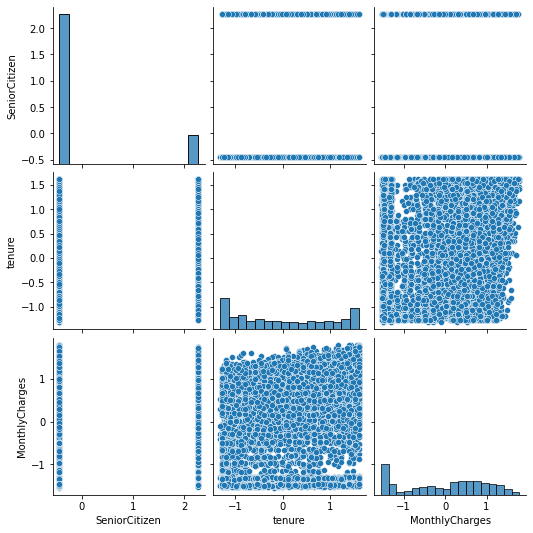

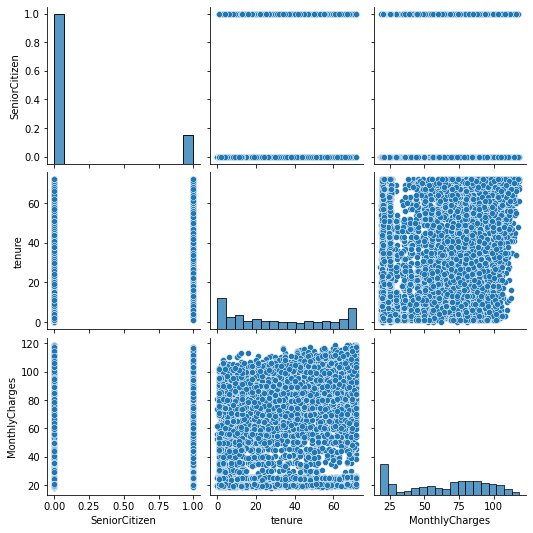

In [29]:
#centered at 0, mean is 1
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)
print(sns.pairplot(pd.DataFrame(Xscaled, columns=xvars)))

#this recreates original data if that is something you would do
Xunscaled = scaler.inverse_transform(Xscaled)
print(sns.pairplot(pd.DataFrame(Xunscaled, columns=xvars)))

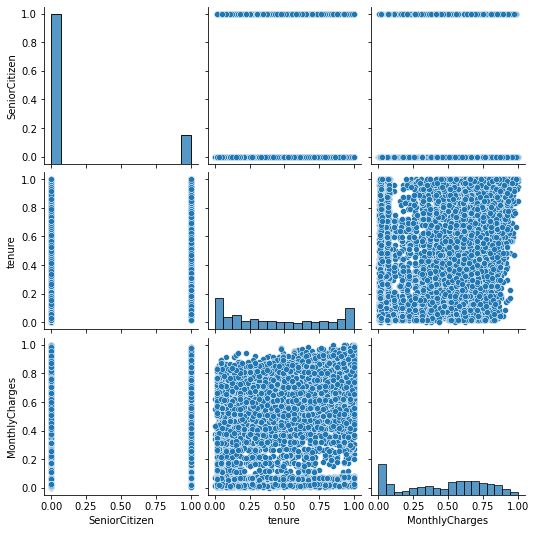

In [24]:
#0 to 1
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)
sns.pairplot(pd.DataFrame(Xscaled, columns=xvars))

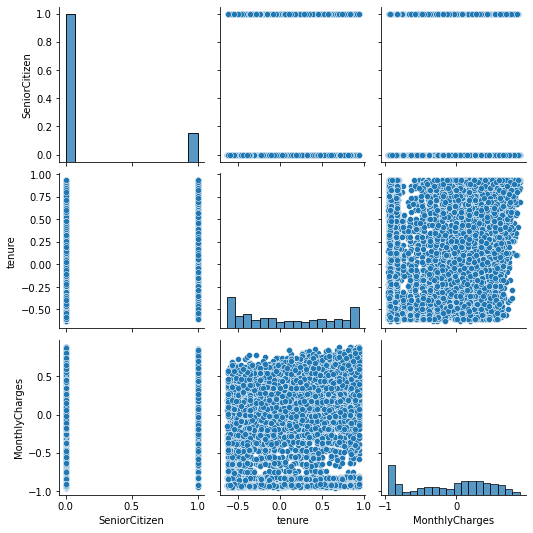

In [25]:
#binary is still 0 to 1, tenure is ~ -.6 to 1
scaler = RobustScaler()
Xscaled = scaler.fit_transform(X)
sns.pairplot(pd.DataFrame(Xscaled, columns=xvars))

Now transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

Normal warps data into a bell curve and uniform gives it a haircut.

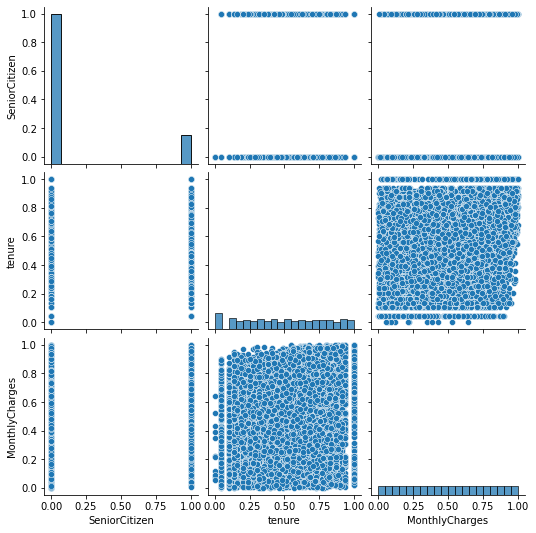

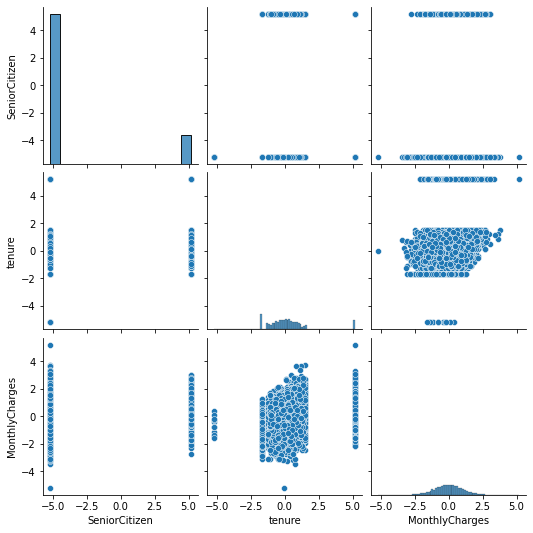

In [30]:
scaler = QuantileTransformer(output_distribution='uniform') #default
Xscaled = scaler.fit_transform(X)
print(sns.pairplot(pd.DataFrame(Xscaled, columns=xvars)))

scaler = QuantileTransformer(output_distribution='normal')
Xscaled = scaler.fit_transform(X)
print(sns.pairplot(pd.DataFrame(Xscaled, columns=xvars)))